# Explore here

In [40]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
df.to_csv("../data/raw/bank-marketing-campaign-data.csv", index=False)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

La data tiene 41488 filas y 21 columnas

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No hay valores nulos

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [7]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [8]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

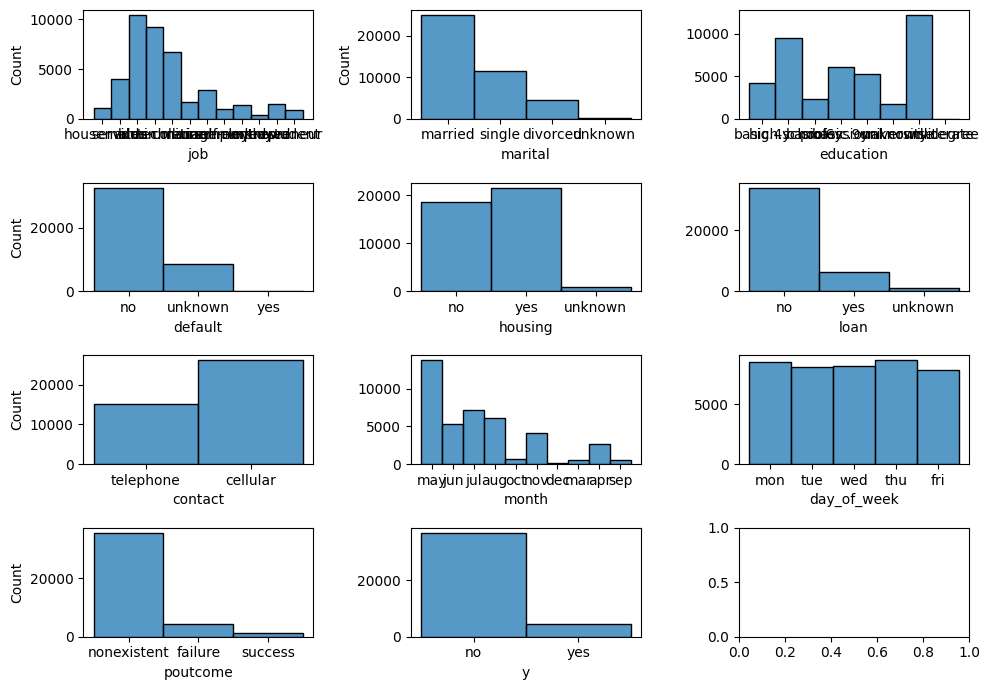

In [9]:
fig, axis = plt.subplots(4, 3, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "job")
sns.histplot(ax = axis[0, 1], data = df, x = "marital")
sns.histplot(ax = axis[0, 2], data = df, x = "education").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "default")
sns.histplot(ax = axis[1, 1], data = df, x = "housing").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = df, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = df, x = "contact")
sns.histplot(ax = axis[2, 1], data = df, x = "month").set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = df, x = "day_of_week").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = df, x = "poutcome")
sns.histplot(ax = axis[3, 1], data = df, x = "y").set(ylabel = None)

plt.tight_layout()
plt.show()

In [10]:
df['marital'] = df['marital'].map({'married':0, 'single':1, 'divorced':2, 'unknown':3})
df['default'] = df['default'].map({'no':0, 'yes':1, 'unknown':3})
df['housing'] = df['housing'].map({'no':0, 'yes':1, 'unknown':3})
df['loan'] = df['loan'].map({'no':0, 'yes':1, 'unknown':3})
df['contact'] = df['contact'].map({'cellular':0, 'telephone':1})
df['month'] = df['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
df['day_of_week'] = df['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})
df['poutcome'] = df['poutcome'].map({'failure':0, 'success':1, 'nonexistent':3})
df['y'] = df['y'].map({'no':0, 'yes':1})


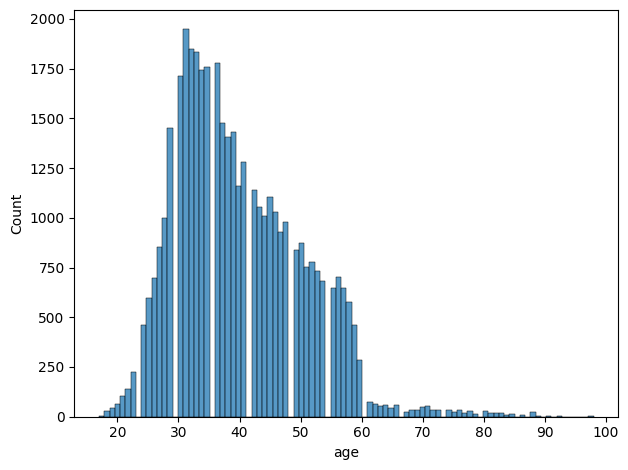

In [27]:
plt.plot(figsize = (10, 5))

sns.histplot( data = df, x = "age")

plt.tight_layout()
plt.show()

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<Axes: >

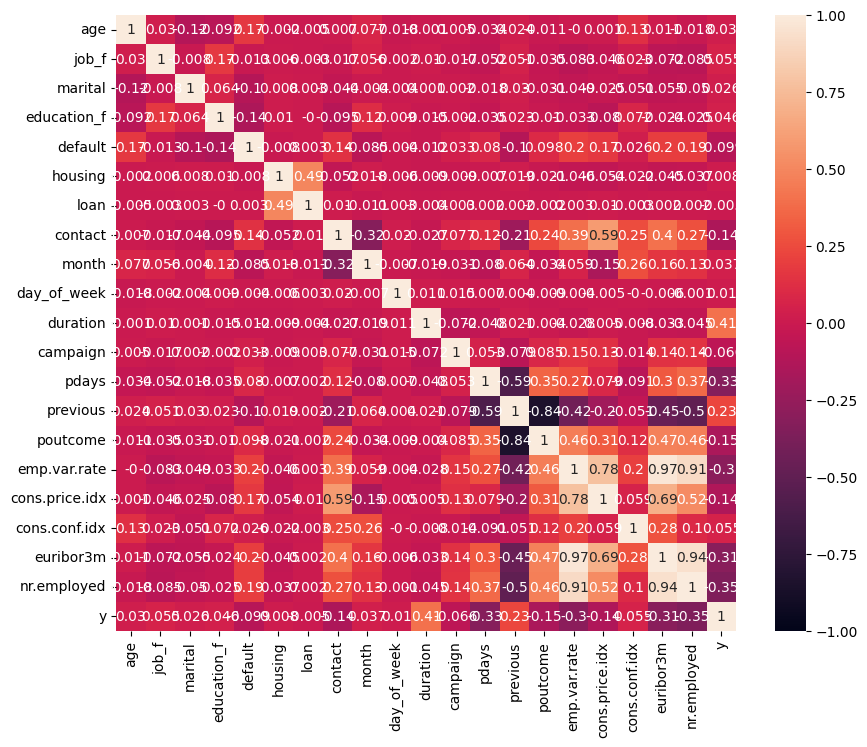

In [30]:
df["job_f"] = pd.factorize(df["job"])[0]
df["education_f"] = pd.factorize(df["education"])[0]

plt.figure(figsize=(10, 8))
columnas_numericas = ['age', 'job_f', 'marital', 'education_f', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
sns.heatmap(df[columnas_numericas].corr().round(3), vmax=1, vmin=-1, annot=True)

In [31]:
num_variables = ['age', 'job_f', 'marital', 'education_f', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m']

# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("y", axis = 1)[num_variables]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
predicciones = model.predict(X_test)


In [37]:
accuracy_score(y_test, predicciones)

0.9092012624423403

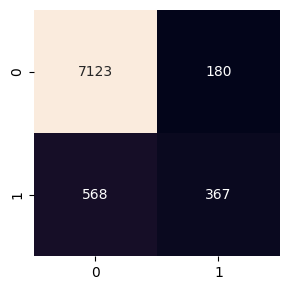

In [39]:
matriz = confusion_matrix(y_test, predicciones)

matriz_df = pd.DataFrame(matriz)

plt.figure(figsize = (3, 3))
sns.heatmap(matriz_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [41]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [42]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [43]:
model_grid = LogisticRegression(penalty = "l2", C = 0.1, solver = "newton-cg")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9107793153678078

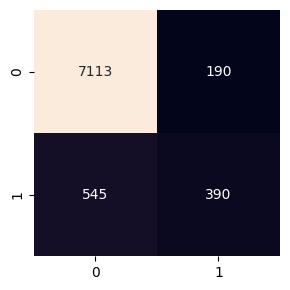

In [44]:
matriz_grid = confusion_matrix(y_test, y_pred)

matriz_grid_df = pd.DataFrame(matriz_grid)

plt.figure(figsize = (3, 3))
sns.heatmap(matriz_grid_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()